# Timelapse Brightfield

In [1]:
%pip uninstall basicpy -yq
%pip install basicpy -q

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.914518960205896e-07.
INFO:basicpy.basicpy:mean of S: 0.9999986886978149.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 9.91389583759883e-07.
INFO:basicpy.basicpy:mean of S: 1.0000004768371582.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.23966380953788757
INFO:basicpy.basicpy:elapsed time: 6.885990499984473 seconds
INFO:basicpy.basicpy:reweighting iteration 2
INFO:basicpy.basicpy:single-step optimization score: 9.853363280853955e-07.
INFO:basicpy.basicpy:mean of S: 0.9999994039535522.
INFO:basicpy.basicpy:Iteration 2 finished.
INFO:basicpy.basicpy:reweighting score: 0.011237598024308681
INFO:basicpy.basicpy:elapsed time: 8.051769539015368 seconds
INFO:basicpy.basicpy:reweigh

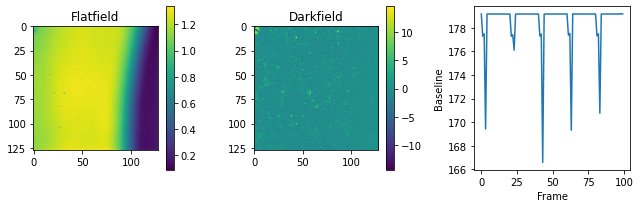

In [2]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images = bdata.timelapse_brightfield()
basic = BaSiC(get_darkfield=True)
basic.fit(images)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()


In [3]:
images_transformed = basic.transform(images)


INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:unshading in 8 threads
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.02015802398091182 seconds ===


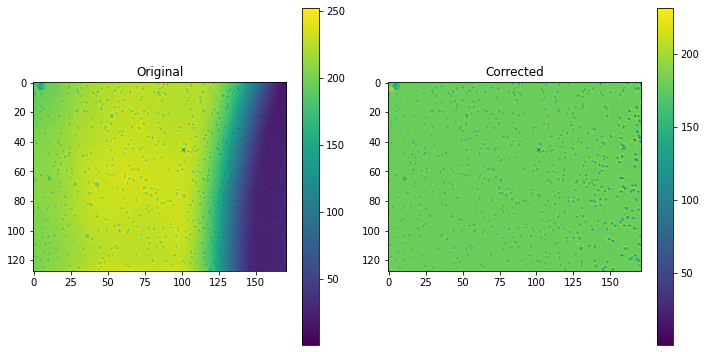

In [4]:
i = 12
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()
